In [1]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [33]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'lab' : {
        'vmin' : 20, 
        'vmax' : 2000},
    'gul' : {
        'vmin' : 20, 
        'vmax' : 1000},
    'noe' : {
        'vmin' : 10, 
        'vmax' : 1600},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}



reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [34]:
def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)

## Function to crop the dataset

def Crops(coord, d_set):
    lon1, lon2 = reg_ext[coord]['lon']
    lat1, lat2 = reg_ext[coord]['lat']
    name_fig = reg_ext[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))



In [35]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
fl_n1 = 'ARMOR_*.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
mld_a = c_armor.mlotst

In [36]:
## some other packages
from scipy import stats
from matplotlib import ticker

In [37]:
## Selecting season
data = Crops(coord='gul', d_set=mld_a)

wint = data.sel(time=slice('2005-11-01', '2006-04-30'))
summ = data.sel(time=slice('2006-05-01', '2006-10-30'))


print(summ.time)

<xarray.DataArray 'time' (time: 26)>
array(['2006-05-03T00:00:00.000000000', '2006-05-10T00:00:00.000000000',
       '2006-05-17T00:00:00.000000000', '2006-05-24T00:00:00.000000000',
       '2006-05-31T00:00:00.000000000', '2006-06-07T00:00:00.000000000',
       '2006-06-14T00:00:00.000000000', '2006-06-21T00:00:00.000000000',
       '2006-06-28T00:00:00.000000000', '2006-07-05T00:00:00.000000000',
       '2006-07-12T00:00:00.000000000', '2006-07-19T00:00:00.000000000',
       '2006-07-26T00:00:00.000000000', '2006-08-02T00:00:00.000000000',
       '2006-08-09T00:00:00.000000000', '2006-08-16T00:00:00.000000000',
       '2006-08-23T00:00:00.000000000', '2006-08-30T00:00:00.000000000',
       '2006-09-06T00:00:00.000000000', '2006-09-13T00:00:00.000000000',
       '2006-09-20T00:00:00.000000000', '2006-09-27T00:00:00.000000000',
       '2006-10-04T00:00:00.000000000', '2006-10-11T00:00:00.000000000',
       '2006-10-18T00:00:00.000000000', '2006-10-25T00:00:00.000000000'],
      dtype='

## Summer

500 10.0998535


<IPython.core.display.Javascript object>


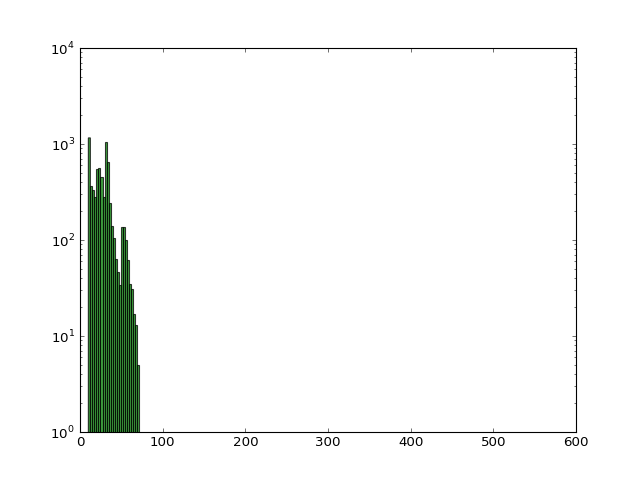

In [38]:
mx = 500#np.nanmax(summ[:])
mn = np.nanmin(summ[:])
n_bins = 200

print(mx, mn)

d_frame = summ[20].to_dataframe()
d_nonan = d_frame.dropna(how='any')

%matplotlib notebook

plt.yscale("log")

values = d_nonan.mlotst
n, bins, patches = plt.hist(values, n_bins, range=(mn, mx), facecolor='g', alpha=0.75)

#plt.grid()
#plt.show()

#print(patches)
#print(bins)


In [39]:
ind = np.linspace(mn, mx,n_bins)
heigth = np.empty(n_bins)

#len(cropped_d.time)
for i in range(len(summ.time)):
    d_frame = summ[i].to_dataframe()
    d_nonan = d_frame.dropna(how='any')
    
    mean = d_nonan.mlotst.mean()
    sd = d_nonan.std()
    #a = np.append(a, mean)
    #s = np.append(s, sd)
    
    values = d_nonan.mlotst
    hist, bins = np.histogram(values, bins=n_bins, range=(mn, mx), normed=False)
    
    heigth = np.vstack((heigth, hist))

h = np.delete(heigth, 0, 0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


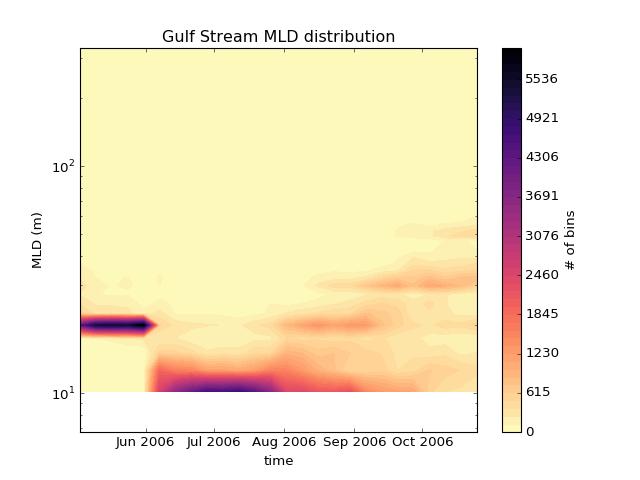

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [40]:
x = summ.time
y = np.arange(mn, mx, abs((mn-mx)/n_bins))
X, Y = np.meshgrid(x, y)

vmin = h.min()
vmax = h.max()

fig, ax = plt.subplots()

ax.set_yscale("log", nonposy='clip')
cs = ax.contourf(X, Y, h.T, levels=np.linspace(vmin,vmax,50),
                 cmap='magma_r')

ax.set_xlabel('time')
ax.set_ylabel('MLD (m)')
ax.set_title('Gulf Stream MLD distribution')

cb = fig.colorbar(cs, ax=ax, orientation='vertical')
cb.set_label('# of bins')
    
#name_fig = 'MLD_' + year[dat] + '.pdf'
#fig.savefig(name_fig, bbox_inches='tight')
plt.show()

## Winter

In [30]:
wint.time

<xarray.DataArray 'time' (time: 26)>
array(['2005-11-02T00:00:00.000000000', '2005-11-09T00:00:00.000000000',
       '2005-11-16T00:00:00.000000000', '2005-11-23T00:00:00.000000000',
       '2005-11-30T00:00:00.000000000', '2005-12-07T00:00:00.000000000',
       '2005-12-14T00:00:00.000000000', '2005-12-21T00:00:00.000000000',
       '2005-12-28T00:00:00.000000000', '2006-01-04T00:00:00.000000000',
       '2006-01-11T00:00:00.000000000', '2006-01-18T00:00:00.000000000',
       '2006-01-25T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-02-08T00:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2006-02-22T00:00:00.000000000', '2006-03-01T00:00:00.000000000',
       '2006-03-08T00:00:00.000000000', '2006-03-15T00:00:00.000000000',
       '2006-03-22T00:00:00.000000000', '2006-03-29T00:00:00.000000000',
       '2006-04-05T00:00:00.000000000', '2006-04-12T00:00:00.000000000',
       '2006-04-19T00:00:00.000000000', '2006-04-26T00:00:00.000000000'],
      dtype='

2500 19.300049


<IPython.core.display.Javascript object>


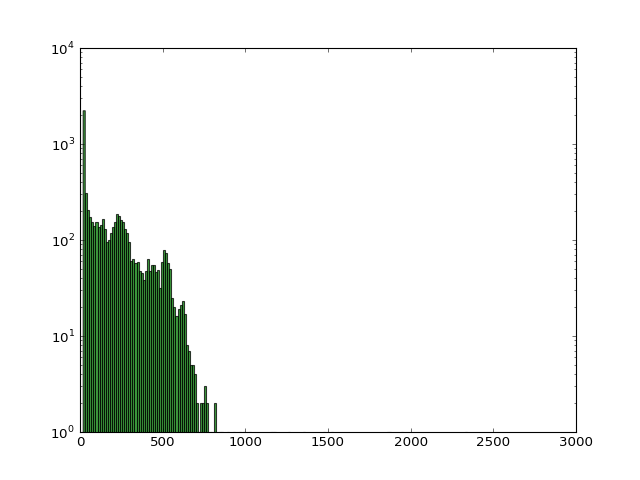

In [31]:
mx = 2500 #np.nanmax(wint.values)
mn = np.nanmin(wint.values)
n_bins = 200

print(mx, mn)

d_frame = wint[20].to_dataframe()
d_nonan = d_frame.dropna(how='any')

%matplotlib notebook

plt.yscale("log")

values = d_nonan.mlotst
n, bins, patches = plt.hist(values, n_bins, range=(mn, mx), facecolor='g', alpha=0.75)

#plt.grid()
#plt.show()

#print(patches)
#print(bins)


In [27]:
ind = np.linspace(mn, mx,n_bins)
heigth = np.empty(n_bins)

#len(cropped_d.time)
for i in range(len(wint.time)):
    d_frame = wint[i].to_dataframe()
    d_nonan = d_frame.dropna(how='any')
    
    mean = d_nonan.mlotst.mean()
    sd = d_nonan.std()
    #a = np.append(a, mean)
    #s = np.append(s, sd)
    
    values = d_nonan.mlotst
    hist, bins = np.histogram(values, bins=n_bins, range=(mn, mx), normed=False)
    
    heigth = np.vstack((heigth, hist))

h = np.delete(heigth, 0, 0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


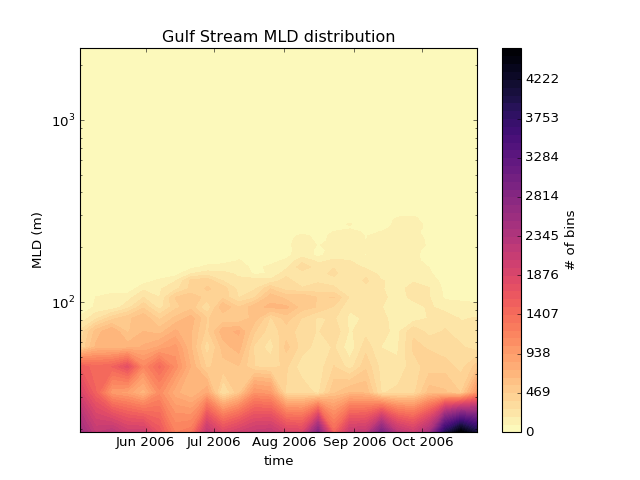

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [32]:
x = summ.time
y = np.arange(mn, mx, abs((mn-mx)/n_bins))
X, Y = np.meshgrid(x, y)

vmin = h.min()
vmax = h.max()

fig, ax = plt.subplots()

ax.set_yscale("log", nonposy='clip')
cs = ax.contourf(X, Y, h.T, levels=np.linspace(vmin,vmax,50),
                 cmap='magma_r')

ax.set_xlabel('time')
ax.set_ylabel('MLD (m)')
ax.set_title('Gulf Stream MLD distribution')

cb = fig.colorbar(cs, ax=ax, orientation='vertical')
cb.set_label('# of bins')
    
#name_fig = 'MLD_' + year[dat] + '.pdf'
#fig.savefig(name_fig, bbox_inches='tight')
plt.show()